### Problem Statement

The objective of this project is to conduct data cleaning and exploratory data analysis (EDA) on a dataset detailing student performance across various subjects.The aim is to clean the data by handling missing values, duplicates, and outliers, followed by an exploration of the relationships between variables and identification of patterns and trends in the data. Through EDA, we seek to understand factors influencing student performance and extract insights that can inform educational interventions or support strategies.

### Data Loading

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/Aakash/Desktop/ML/StudentsPerformance.csv")

In [3]:
# Understanding the data
df = pd.DataFrame(data)
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


### Data Exploration

In [4]:
df.shape

(1000, 8)

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [7]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Data Cleaning

In [9]:
df['test preparation course'] = df['test preparation course'].map({'none': 0, 'completed': 1})

# Printing the cleaned DataFrame
print("Cleaned DataFrame:")
print(df)

Cleaned DataFrame:
     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

     test preparation course  math score  reading score  writing score  
0                          0          72   

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,0,72,72,74
1,female,group C,some college,standard,1,69,90,88
2,female,group B,master's degree,standard,0,90,95,93
3,male,group A,associate's degree,free/reduced,0,47,57,44
4,male,group C,some college,standard,0,76,78,75


In [11]:
#Checking for null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
# Checking for duplicate rows
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []


### Data Visualization and Interpretation

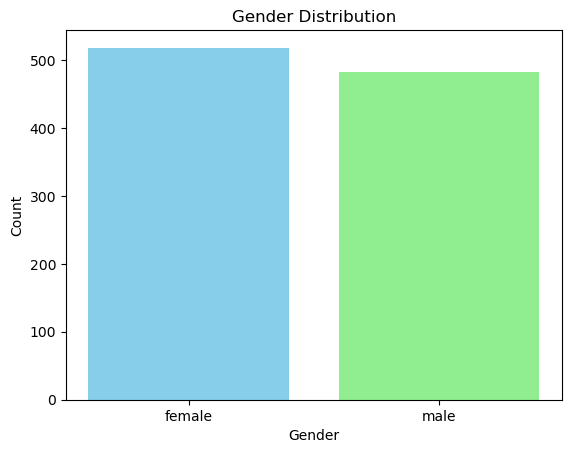

In [74]:
#Bar plot for Gender distribution
gender_counts = df['gender'].value_counts()
colors = ['skyblue', 'lightgreen']

plt.bar(gender_counts.index, gender_counts.values, color=colors)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


The bar plot illustrates the distribution of genders within the dataset. Each bar represents a gender category ('male' or 'female'), and the height of the bar corresponds to the count of students belonging to each gender category.By visualizing the gender distribution in this manner, we can quickly grasp the relative proportion of male and female students in the dataset.

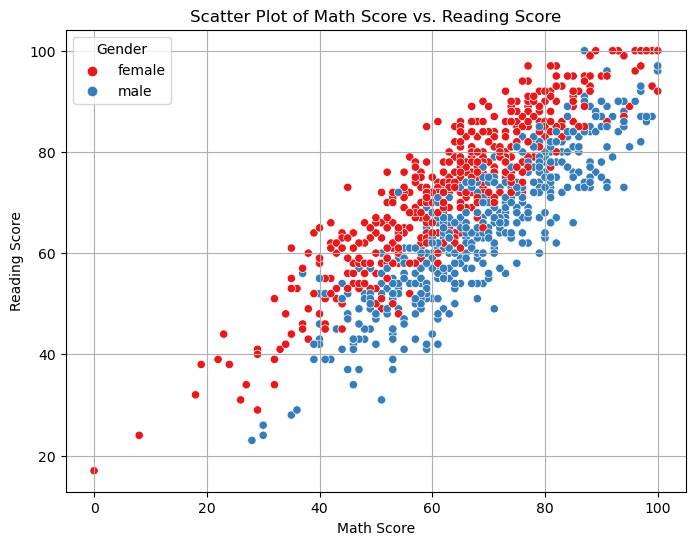

In [72]:
# Scatter plot for math score vs. reading score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='math score', y='reading score', hue='gender', palette='Set1')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Scatter Plot of Math Score vs. Reading Score')
plt.grid(True)
plt.legend(title='Gender', loc='upper left')
plt.show()

The scatter plot illustrates the relationship between math scores and reading scores for students, with each data point representing a student. The x-axis represents math scores, while the y-axis represents reading scores. The plot is further differentiated by gender, with different colors indicating male and female students.

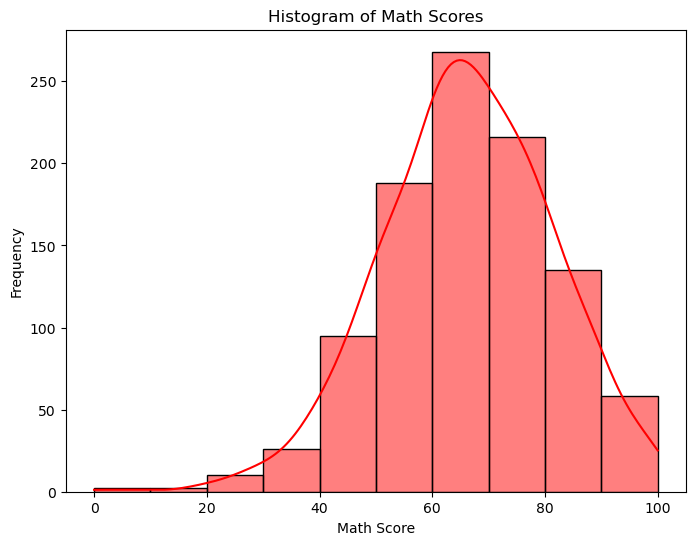

In [54]:
# Plotting histogram for math scores
plt.figure(figsize=(8, 6))
sns.histplot(data['math score'], bins=10,kde=True,color='red')
plt.title('Histogram of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

The histogram illustrates the distribution of math scores among the students in the dataset. Each bar on the histogram represents a range of math scores, and the height of each bar corresponds to the frequency of scores falling within that range. The x-axis represents the math scores, while the y-axis represents the frequency or count of students with scores falling within each range.

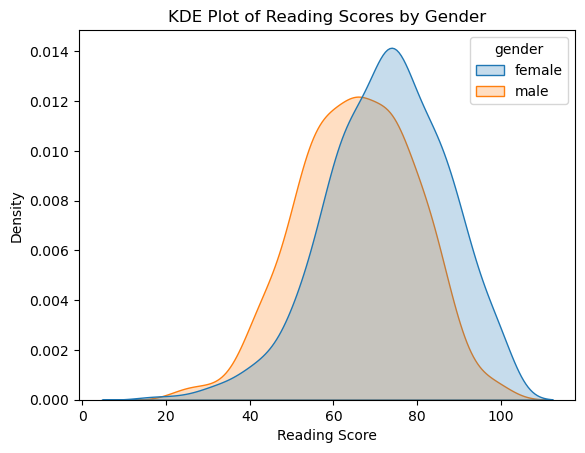

In [58]:
# Plotting KDE plot for math score
sns.kdeplot(data=df, x='reading score', hue='gender', fill=True)

# Adding title and labels
plt.title('KDE Plot of Reading Scores by Gender')
plt.xlabel('Reading Score')
plt.ylabel('Density')

# Displaying the plot
plt.show()

The KDE plot provides insights into the distribution and density of reading scores among different genders, allowing for comparisons and identifying potential differences or patterns.

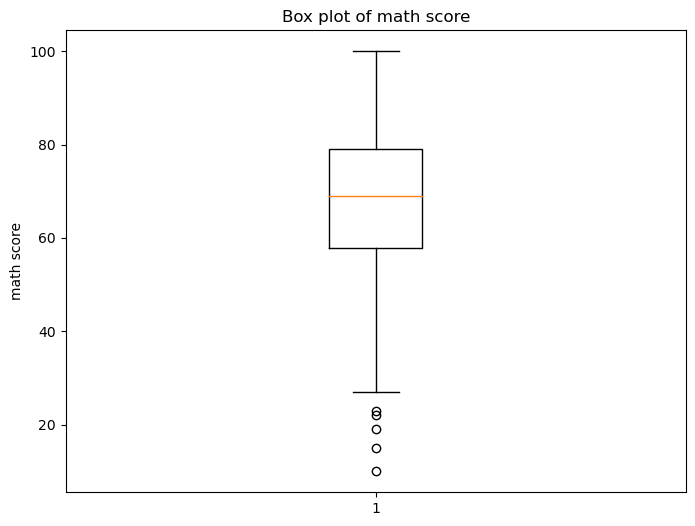

In [60]:
# Box plot for 'price' column
plt.figure(figsize=(8, 6))
plt.boxplot(data['writing score'])
plt.title('Box plot of math score')
plt.ylabel('math score')
plt.show()

A box plot visually represents the distribution of data through key statistical measures such as median, quartiles, and potential outliers. By analyzing the box plot, insights can be gained into the distribution and variability of writing scores, aiding in understanding student performance in writing and identifying potential outliers within the dataset.

C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


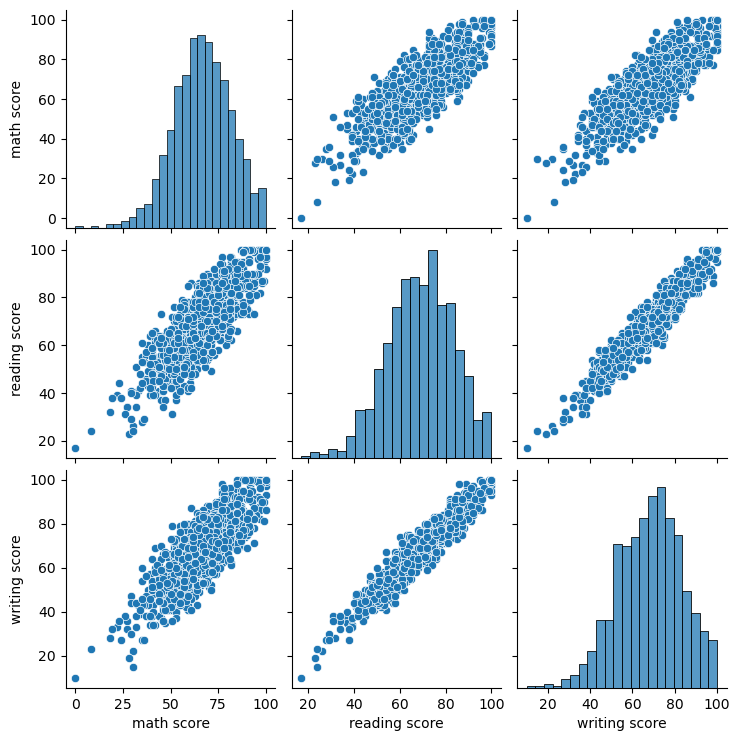

In [69]:
# Selecting columns for pairplot
columns_for_pairplot = ['math score', 'reading score', 'writing score']

# Plotting pairplot for selected columns
sns.pairplot(df[columns_for_pairplot])

# Displaying the plot
plt.show()

By analyzing the pair plot, we can identify patterns such as correlations between scores in different subjects, clusters of data points indicating possible subgroups of students, and any outliers or unusual observations. This visualization aids in understanding the overall structure of the dataset and can provide valuable insights for further analysis or modeling.

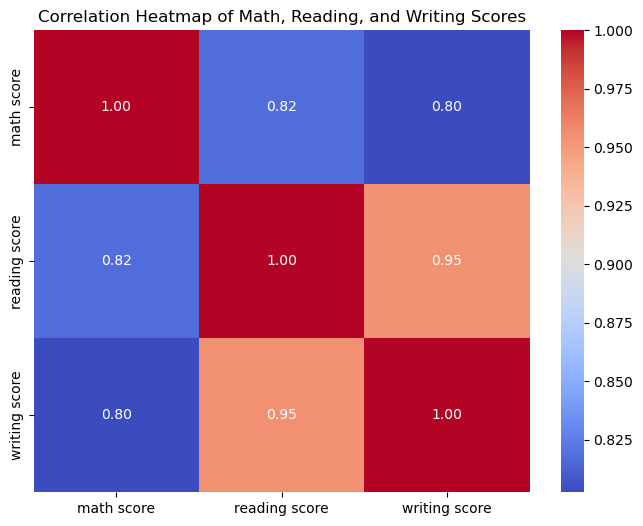

In [70]:
# Compute the correlation matrix
corr = df[['math score', 'reading score', 'writing score']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Math, Reading, and Writing Scores')
plt.show()

The correlation matrix provides insights into the relationships between the math, reading, and writing scores, allowing for a better understanding of how these variables are related and potentially influencing each other in the dataset.